# Sonification of Chromagrams
In this notebook, we illustrate the sonification of chromagrams using the ```libsoni.core.chroma``` module. A chromagram can be seen as a representation of the distribution of musical pitch classes, a feature often used in MIR Applications.

In [1]:
import os
import sys
import numpy as np
import librosa
import pandas as pd

from matplotlib import pyplot as plt
import IPython.display as ipd

from libsoni.util.utils import mix_sonification_and_original
from libsoni.core.chroma import sonify_chromagram

sys.path.append('..')
import libfmp.b
import libfmp.c8

%matplotlib inline

Fs = 22050

## Simple Scenario: C Major Cadence
To start with a simple example, let's look at the chords of a C major cadence: **C:maj**, **F:maj** and **G:maj**.
<img src="figures/demo_chroma/C_Major_Cadence.png" alt="C-Major-Triad" width="500">

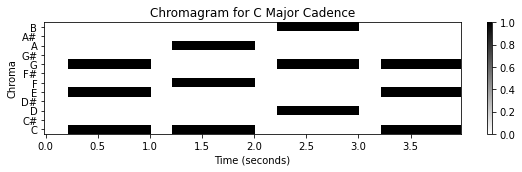

In [2]:
fn_ann = os.path.join('data_csv', 'demo_chroma', 'C_Major_Cadence.csv')

note_list_df = pd.read_csv(fn_ann, sep=';')
x_dur = note_list_df['Start'].iloc[-1] + note_list_df['Duration'].iloc[-1]

note_list = [[start, dur, pitch, vel, ins] for i, 
             (start, dur, pitch, vel, ins) in note_list_df.iterrows()]
# Chromgram from annotations
from libsoni.core.chroma import sonify_chromagram

H = 512 
num_frames = int(x_dur*Fs / H)
Fs_frame = Fs / H
C_ann = libfmp.b.list_to_chromagram(note_list, num_frames, Fs_frame)

title = 'Chromagram for C Major Cadence'
libfmp.b.plot_chromagram(C_ann, Fs=Fs_frame, title=title, figsize=(8, 2.5))
plt.show()

### Sonified C Major Cadence

In [3]:
# Sonification
x_chroma_ann = sonify_chromagram(C_ann,pitch_range=[60,72+12],H=512,fs=Fs)
print('Sonification of chroma-based respresentation (mono):')
ipd.display(ipd.Audio(x_chroma_ann, rate=Fs))


Sonification of chroma-based respresentation (mono):


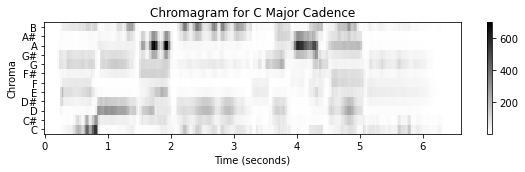

In [4]:
fn_wav = os.path.join('data_audio', '##', '01-AchGottundHerr.wav')

x, Fs = librosa.load(fn_wav, sr=Fs)


import librosa, librosa.display
C = librosa.feature.chroma_stft(y=x, sr=Fs, tuning=0, norm=0, hop_length=512, n_fft=1024)
libfmp.b.plot_chromagram(C, Fs=Fs_frame, title=title, figsize=(8, 2.5))
plt.show()



c_test = sonify_chromagram(C,H=512,fs=22050)
ipd.display(ipd.Audio(c_test, rate=Fs))


In [5]:
bach_audio, _ = librosa.load(os.path.join('data_audio','demo_f0','01-AchGottundHerr.wav'), sr=Fs)
bach_sonified_w_original = mix_sonification_and_original(sonification=c_test,
                                                         original_audio=bach_audio,
                                                         gain_lin_sonification=0.2,
                                                         gain_lin_original_audio=1)
ipd.display(ipd.Audio(bach_sonified_w_original, rate=Fs))